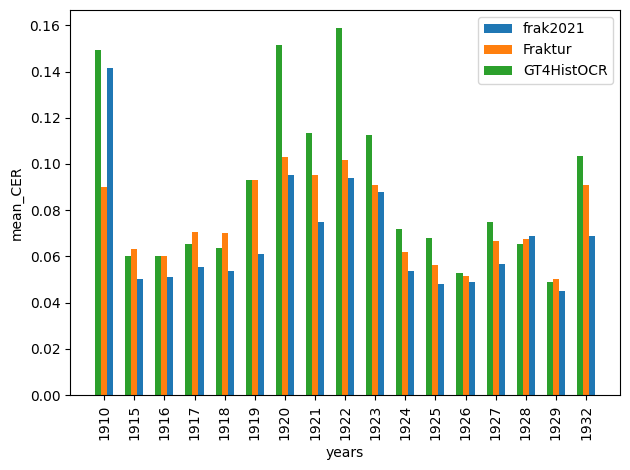

In [2]:
# plot evaluation of OCR results

import os
from evaluate_ocr import summarize_ocr_result

datapath_annotation = '../../data/001_Annotation'
datapath_OCR_evaluation = '../../data/003_OCR_evaluation'

years = os.listdir(datapath_annotation)
evaluate_data = 'train'

frak2021_res,Fraktur_res,GT4HistOCR_res = summarize_ocr_result(datapath_OCR_evaluation,years,evaluate_data,True)

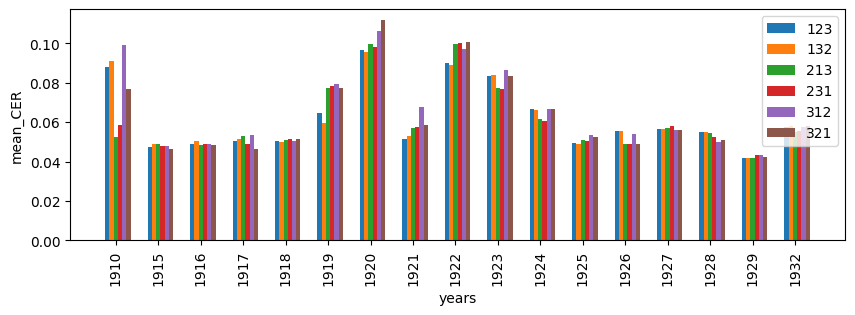

In [5]:
# plot evaluation of corrected OCR results for different optimization orders

import os
from evaluate_corrected_ocr import summarize_ocr_correction_result

datapath_annotation = '../../data/001_Annotation'
datapath_OCR_evaluation = '../../data/004_OCR_correction_evaluation'

years = os.listdir(datapath_annotation)
evaluate_data = 'train'

order_123_res,order_132_res,order_213_res,order_231_res,order_312_res,order_321_res = summarize_ocr_correction_result(datapath_annotation,datapath_OCR_evaluation,years,evaluate_data,True)

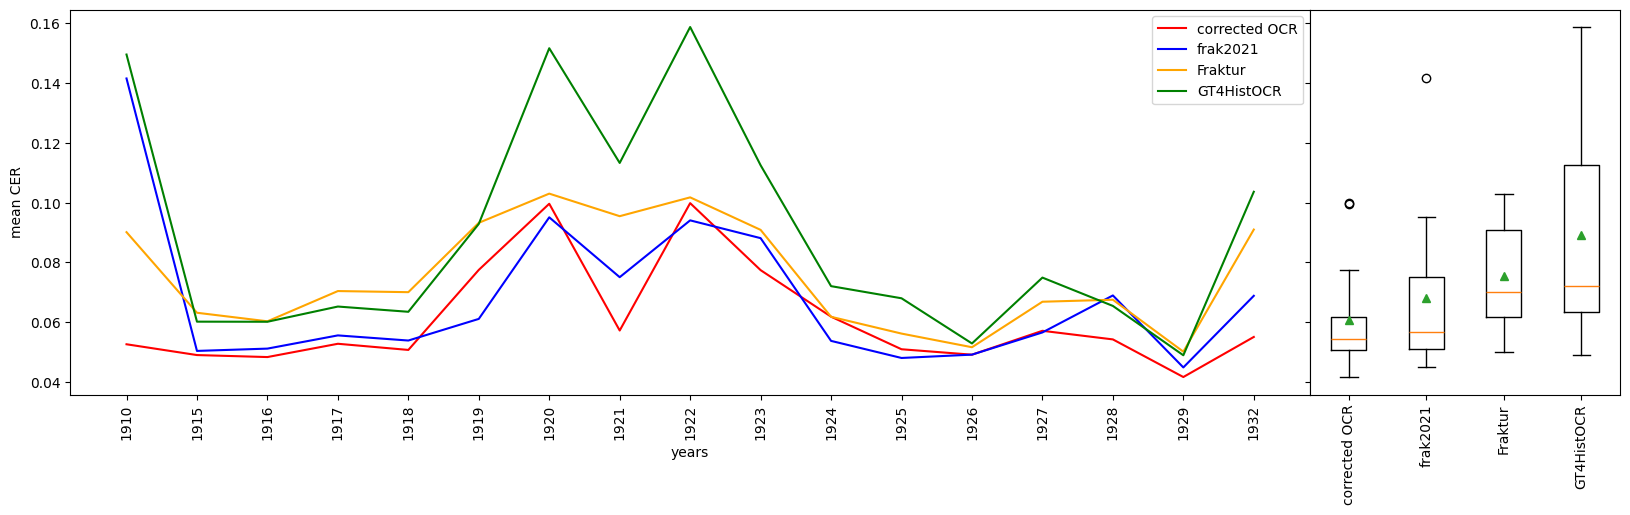

In [5]:
# plot evaluation of corrected OCR results specific order and compare to ocr models

import os
import matplotlib.pyplot as plt 
import numpy as np
from evaluate_corrected_ocr import summarize_ocr_correction_result
from evaluate_ocr import summarize_ocr_result

datapath_annotation = '../../data/001_Annotation'
datapath_OCR_correction_evaluation = '../../data/004_OCR_correction_evaluation'
datapath_OCR_evaluation = '../../data/003_OCR_evaluation'


years = os.listdir(datapath_annotation)
evaluate_data = 'train'

order_123_res,order_132_res,order_213_res,order_231_res,order_312_res,order_321_res = summarize_ocr_correction_result(datapath_annotation,datapath_OCR_correction_evaluation,years,evaluate_data,False)
frak2021_res,Fraktur_res,GT4HistOCR_res = summarize_ocr_result(datapath_OCR_evaluation,years,evaluate_data,False)

fig = plt.figure(figsize= (20,5))
gs = fig.add_gridspec(1, 2, wspace=0,width_ratios=[4, 1])
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
x_axis = np.arange(0,len(years),dtype=int)

ax1.plot(x_axis,order_213_res,'r',label='corrected OCR')
ax1.plot(x_axis,frak2021_res,'b',label='frak2021')
ax1.plot(x_axis,Fraktur_res,'orange',label='Fraktur')
ax1.plot(x_axis,GT4HistOCR_res,'green',label='GT4HistOCR')
ax1.set(xlabel = 'years',ylabel='mean CER')
ax1.set_xticks(x_axis, years,rotation='vertical')

ax2.boxplot([order_213_res,frak2021_res,Fraktur_res,GT4HistOCR_res,], showmeans=True)
ax2.set_xticks([1,2,3,4], ['corrected OCR','frak2021','Fraktur','GT4HistOCR'],rotation='vertical')
ax1.legend()
fig.savefig('OCR_correction_evaluation_model_comparison.png', dpi=fig.dpi)

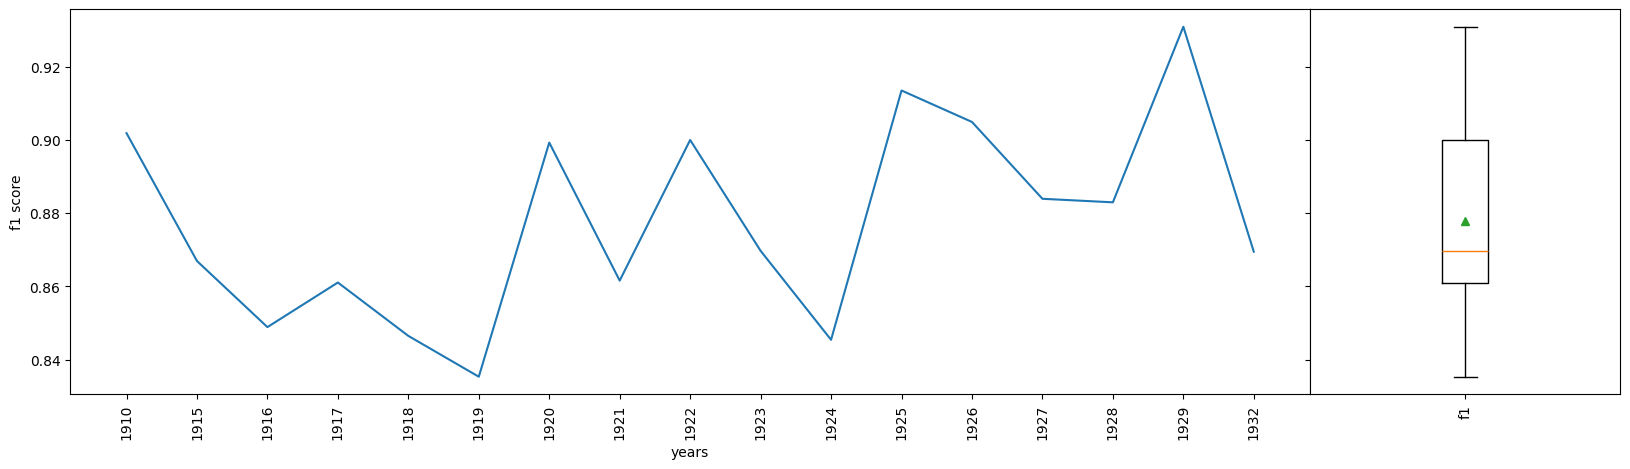

In [4]:
import os
import matplotlib.pyplot as plt 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from evaluate_structuring import evaluate_structuring_GT

datapath_annotation = '../../data/001_Annotation'
datapath_structuring = '../../data/005_Structuring_evaluation'

years = sorted(os.listdir(datapath_annotation))
evaluate_data = 'train'

fscore_years = evaluate_structuring_GT(datapath_annotation,datapath_structuring,years,evaluate_data,plot_result = False,enable_output=False)

fig = plt.figure(figsize= (20,5))
gs = fig.add_gridspec(1, 2, wspace=0,width_ratios=[4, 1])
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
x_axis = np.arange(0,len(years),dtype=int)


ax1.plot(x_axis,fscore_years)
ax1.set(xlabel = 'years',ylabel='f1 score')
ax1.set_xticks(x_axis, years,rotation='vertical')

ax2.boxplot(fscore_years, showmeans=True)
ax2.set_xticks([1], ['f1'],rotation='vertical')
fig.savefig('structuring_GT.png', dpi=fig.dpi)

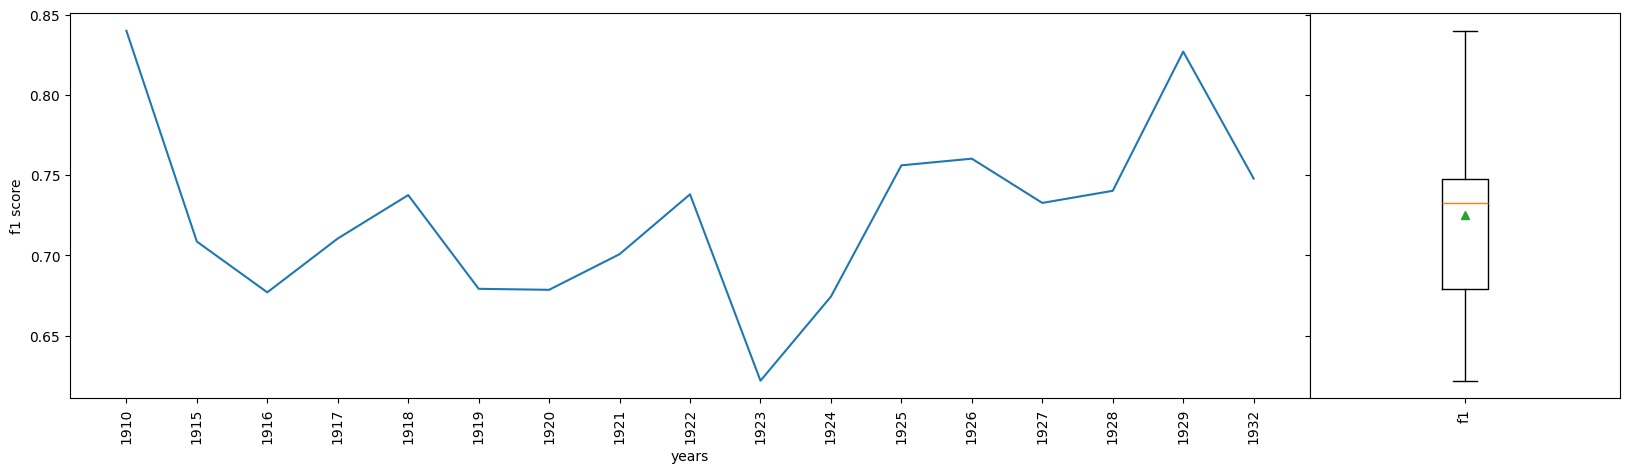

In [3]:
import os
import matplotlib.pyplot as plt 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from evaluate_structuring import evaluate_structuring_OCR_corrected

datapath_annotation = '../../data/001_Annotation'
datapath_structuring = '../../data/005_Structuring_evaluation'

years = sorted(os.listdir(datapath_annotation))
evaluate_data = 'train'

fscore_years = evaluate_structuring_OCR_corrected(datapath_annotation,datapath_structuring,years,evaluate_data,plot_result = False,enable_output=False)

fig = plt.figure(figsize= (20,5))
gs = fig.add_gridspec(1, 2, wspace=0,width_ratios=[4, 1])
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
x_axis = np.arange(0,len(years),dtype=int)


ax1.plot(x_axis,fscore_years)
ax1.set(xlabel = 'years',ylabel='f1 score')
ax1.set_xticks(x_axis, years,rotation='vertical')

ax2.boxplot(fscore_years, showmeans=True)
ax2.set_xticks([1], ['f1'],rotation='vertical')
fig.savefig('structuring_end_to_end.png', dpi=fig.dpi)